In [5]:
from MagicCube import MagicCube
import time
import matplotlib.pyplot as plt


In [6]:
def random_restart_hill_climbing(n, max_restarts=1000, max_iter=1000):
    best_cube = None
    best_fx = float('inf')
    total_iterations = 0
    history = []
    start_time = time.time()
    
    for restart in range(max_restarts):
        print(f"Restart {restart + 1}/{max_restarts}")
        
        # Buat magic cube baru di setiap restart
        cube = MagicCube(n)
        current_fx = cube.objective_function()
        history.append(current_fx)
        
        iteration = 0
        while iteration < max_iter:
            next_states = cube.next_states()
            best_state = None
            best_neighbor_fx = current_fx

            # Cari state terbaik di neighbor
            for next_state in next_states:
                neighbor_fx = next_state.objective_function()
                print(f"Iterasi {iteration}: Current: {current_fx}, Neighbor: {neighbor_fx}")

                if neighbor_fx < best_neighbor_fx:
                    best_state = next_state
                    best_neighbor_fx = neighbor_fx

            # Jika menemukan neighbor lebih baik, perbarui state
            if best_state:
                cube = best_state
                current_fx = best_neighbor_fx
                history.append(current_fx)
            else:
                print("Tidak ada solusi yang lebih baik, berhenti pada local maximum")
                break
            
            iteration += 1

            # Jika solusi valid ditemukan, berhenti
            if cube.is_valid_magic_cube():
                print(f"Solusi ditemukan setelah {iteration} iterasi pada restart {restart + 1}")
                best_cube = cube
                best_fx = current_fx
                total_iterations += iteration
                duration = time.time() - start_time
                print(f"Final State: {best_fx}")
                return cube, history, total_iterations, duration
        
        # Periksa apakah hasil dari restart ini lebih baik
        if current_fx < best_fx:
            best_cube = cube
            best_fx = current_fx
            total_iterations += iteration

    duration = time.time() - start_time
    print(f"Final State after Random Restart: {best_fx}")
    return best_cube, history, total_iterations, duration

In [7]:
def visualize_experiment(initial_cube, final_cube, history):
    print("Initial State:")
    initial_cube.visualize()

    print("Final State:")
    final_cube.visualize()

    plt.plot(range(len(history)), history, color='blue')
    plt.title('Objective Function terhadap Banyak Iterasi')
    plt.xlabel('Iterasi')
    plt.ylabel('Objective Function (f(x))')
    plt.grid(True)
    plt.show()

Restart 1/1000
Iterasi 0: Current: 8857, Neighbor: 8413
Iterasi 0: Current: 8857, Neighbor: 8890
Iterasi 0: Current: 8857, Neighbor: 8857
Iterasi 0: Current: 8857, Neighbor: 8872
Iterasi 0: Current: 8857, Neighbor: 8857
Iterasi 0: Current: 8857, Neighbor: 8857
Iterasi 0: Current: 8857, Neighbor: 8857
Iterasi 0: Current: 8857, Neighbor: 8693
Iterasi 0: Current: 8857, Neighbor: 8857
Iterasi 0: Current: 8857, Neighbor: 8857
Iterasi 1: Current: 8413, Neighbor: 8413
Iterasi 1: Current: 8413, Neighbor: 8413
Iterasi 1: Current: 8413, Neighbor: 8413
Iterasi 1: Current: 8413, Neighbor: 8437
Iterasi 1: Current: 8413, Neighbor: 8413
Iterasi 1: Current: 8413, Neighbor: 8413
Iterasi 1: Current: 8413, Neighbor: 8255
Iterasi 1: Current: 8413, Neighbor: 8413
Iterasi 1: Current: 8413, Neighbor: 8413
Iterasi 1: Current: 8413, Neighbor: 8413
Iterasi 2: Current: 8255, Neighbor: 8255
Iterasi 2: Current: 8255, Neighbor: 8287
Iterasi 2: Current: 8255, Neighbor: 8205
Iterasi 2: Current: 8255, Neighbor: 8218
I

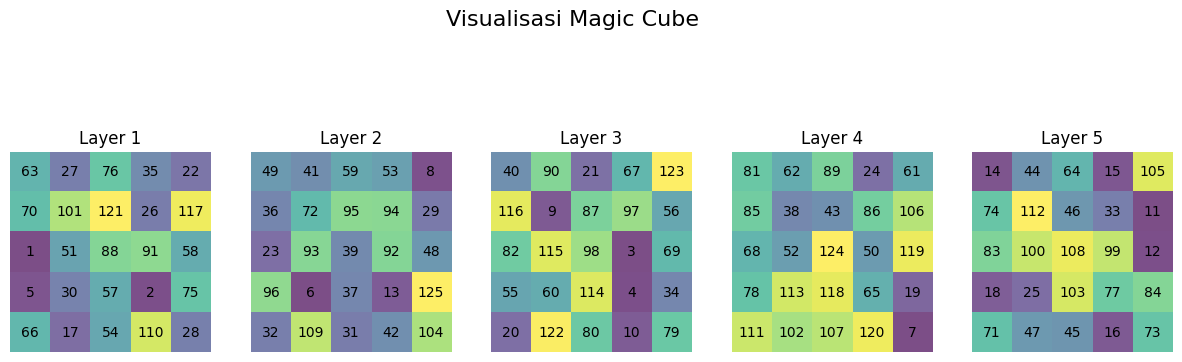

Final State:


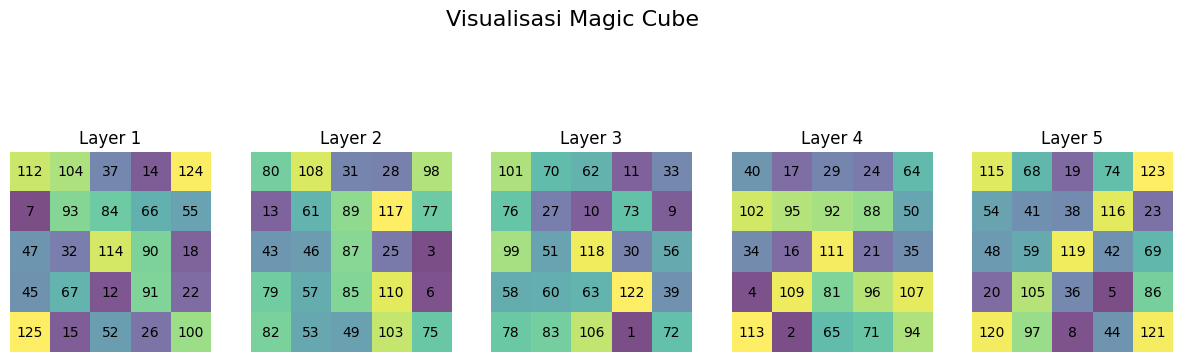

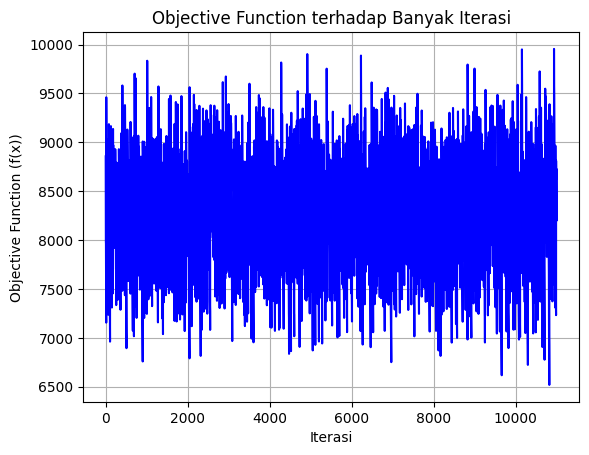

In [8]:
if __name__ == "__main__":
    n = 5
    initial_cube = MagicCube(n)

    final_cube, history, iterations, duration = random_restart_hill_climbing(n)

    print(f"Total Iterasi: {iterations}")
    print(f"Durasi: {duration:.2f} detik")
    visualize_experiment(initial_cube, final_cube, history)